Name : Md. Rasel Mia
ID   : 2125051072

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting random seed for reproducibility

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess the dataset

In [4]:
image_size = (128, 128)
data_dir = "/content/drive/MyDrive/machine learning/project/Dataset"
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


# Conventional Machine Learning Approach

# Feature extraction using pre-trained model

In [5]:
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
features_train = vgg_model.predict(train_data, verbose=1)
features_val = vgg_model.predict(val_data, verbose=1)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 105s 11s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step


# Flattening the features

In [6]:
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_val_flat = features_val.reshape(features_val.shape[0], -1)


In [9]:
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_data.classes)
val_labels = encoder.transform(val_data.classes)

# Training a classifier (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(features_train_flat, train_labels)

# Evaluate the Random Forest model
rf_predictions = rf_model.predict(features_val_flat)
print("Random Forest Classification Report:")
print(classification_report(val_labels, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        20
           1       0.27      0.35      0.30        20
           2       0.37      0.35      0.36        20
           3       0.33      0.30      0.32        20

    accuracy                           0.31        80
   macro avg       0.32      0.31      0.31        80
weighted avg       0.32      0.31      0.31        80



# CNN Approach

In [10]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.3453 - loss: 1.4685 - val_accuracy: 0.4750 - val_loss: 1.3441
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3792 - loss: 1.3299 - val_accuracy: 0.3750 - val_loss: 1.2053
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.4768 - loss: 1.1416 - val_accuracy: 0.5750 - val_loss: 0.9617
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5712 - loss: 0.9758 - val_accuracy: 0.5625 - val_loss: 1.0080
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6824 - loss: 0.7879 - val_accuracy: 0.6750 - val_loss: 0.8669
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8168 - loss: 0.5877 - val_accuracy: 0.6375 - val_loss: 0.8221
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7990 - loss: 0.4978 - val_accuracy: 0.5625 - val_loss: 1.3736
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8341 - loss: 0.4602 - val_accuracy: 0.6875 - val_loss:

# Evaluate the CNN model


In [11]:
cnn_results = cnn_model.evaluate(val_data)
print("CNN Evaluation:", cnn_results)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6187 - loss: 1.1919
CNN Evaluation: [1.1925958395004272, 0.612500011920929]


# Plot training history

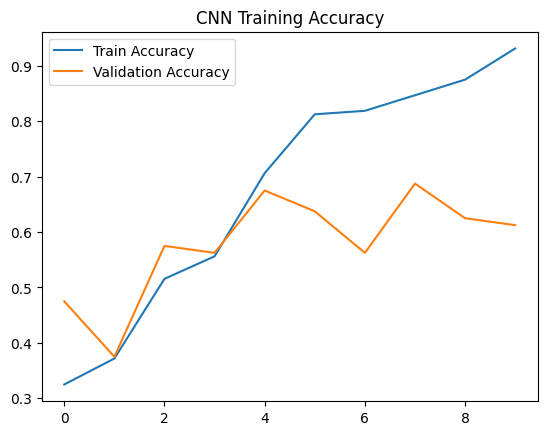

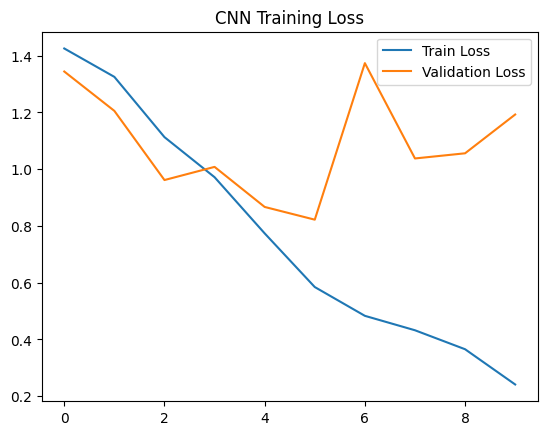

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('CNN Training Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('CNN Training Loss')
plt.show()

# Save the trained CNN model

In [15]:
# Change the file extension to .keras or .h5
cnn_model.save('/content/drive/MyDrive/machine learning/project/Image_3.keras') # or Image_3.h5

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(128, 128)):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

image_path = '/content/drive/MyDrive/machine learning/project/Image_3.jpg'
processed_image = preprocess_image(image_path)


In [20]:
predictions = cnn_model.predict(processed_image) # Change model to cnn_model
predicted_class = np.argmax(predictions, axis=1)
class_indices = {v: k for k, v in train_data.class_indices.items()}  # Reverse mapping
print(f"Predicted class: {class_indices[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted class: Truck


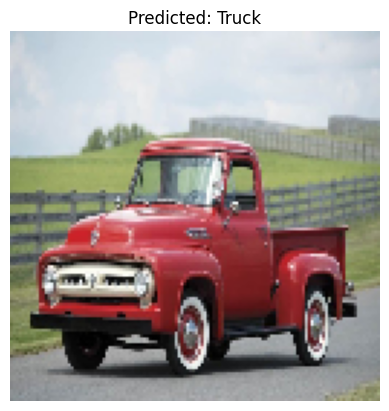

In [21]:
from matplotlib import pyplot as plt

image = load_img(image_path, target_size=(128, 128))
plt.imshow(image)
plt.title(f"Predicted: {class_indices[predicted_class[0]]}")
plt.axis('off')
plt.show()
